# Import all libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Function to generate data

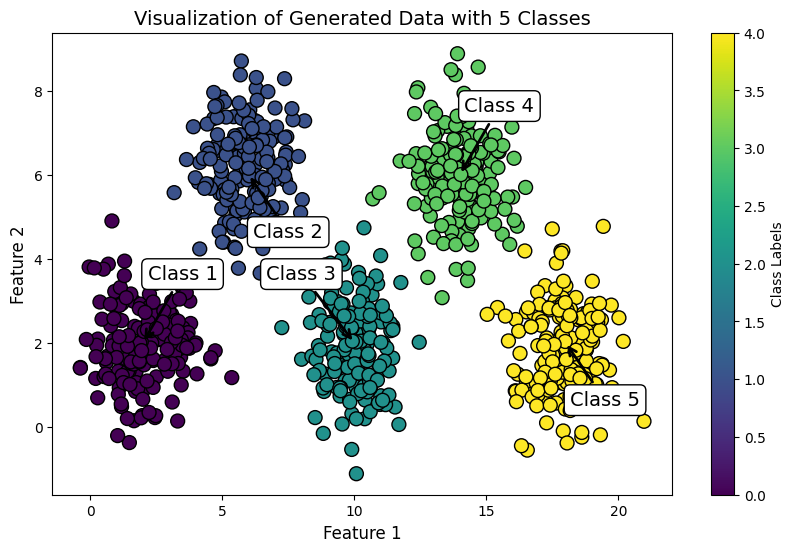

In [14]:
# Function to generate data for 5 classes
def generate_data(samples_per_class=180):
    np.random.seed(32)
    # Class centers for 5 classes
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])
    class4 = np.random.randn(samples_per_class, 2) + np.array([14, 6])
    class5 = np.random.randn(samples_per_class, 2) + np.array([18, 2])

    # Combine the data
    X = np.vstack([class1, class2, class3, class4, class5])
    y = np.array([0] * samples_per_class + [1] * samples_per_class +
                  [2] * samples_per_class + [3] * samples_per_class + [4] * samples_per_class)

    return X, y

# Generate data
X, y = generate_data()

# Encode the classes using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

# Plot the generated data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=100, edgecolor="k")

# Class centers for annotations
centers = [(2, 2), (6, 6), (10, 2), (14, 6), (18, 2)]  # Updated centers for 5 classes
offsets = [(1.5, 1.5), (1.5, -1.5), (-2, 1.5), (1.5, 1.5), (1.5, -1.5)]  # Offset for better placement

for i, (center, offset) in enumerate(zip(centers, offsets)):
    plt.annotate(f'Class {i + 1}',
                 xy=center,
                 xytext=(center[0] + offset[0], center[1] + offset[1]),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                 fontsize=14,
                 color="black",
                 ha="center",
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Adding plot details
plt.title("Visualization of Generated Data with 5 Classes", fontsize=14)
plt.colorbar(scatter, label="Class Labels")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()


The image is a scatter plot visualizing synthetically generated data for five distinct classes, each defined by two numerical features: Feature 1 (x-axis) and Feature 2 (y-axis). Each class is represented as a cluster of points, with color denoting the class label, ranging from 0 to 4, and annotated as Class 1 through Class 5.
The clusters are clearly separated and located at distinct positions in the feature space: Class 1 appears near the bottom-left corner, Class 2 is slightly above and to the right of Class 1, Class 3 is centered around [9, 3], Class 4 is located in the upper-right quadrant, Class 5 is in the lower-right area.

Each class cluster consists of randomly generated data points centered around a fixed location, simulating real-world variation within labeled categories. Annotations are used to label each class cluster directly, aiding in visual identification and interpretation.

On the right, a color bar serves as a legend for the class labels, helping connect the numeric class values (0–4) to their corresponding visual clusters.

This plot provides a clear and intuitive visualization of class separability, making it a valuable tool for assessing how well classification models might distinguish between these well-separated classes.

In [15]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training, validation, and test sets

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

# Print the sizes of the splits

In [17]:
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 540 samples
Validation set: 180 samples
Test set: 180 samples


# Define the custom neural network class

In [18]:
class NeuralNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr):
        # Initialize weights for all layers
        self.W1 = np.random.randn(input_size, hidden_size1)  # Input to Hidden Layer 1
        self.W2 = np.random.randn(hidden_size1, hidden_size2)  # Hidden Layer 1 to Hidden Layer 2
        self.W3 = np.random.randn(hidden_size2, hidden_size3)  # Hidden Layer 2 to Hidden Layer 3
        self.W4 = np.random.randn(hidden_size3, output_size)  # Hidden Layer 3 to Output Layer
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        # Layer 1
        self.hidden_input1 = np.dot(x, self.W1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        # Output Layer
        self.output_input = np.dot(self.hidden_output3, self.W4)
        self.output = self.sigmoid(self.output_input)
        return self.output

    def backprop(self, x, y, output):
        # Output Layer Error
        output_error = y - output
        output_delta = output_error * self.sigmoid(output, derivative=True)

        # Hidden Layer 3 Error
        hidden_error3 = np.dot(output_delta, self.W4.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, derivative=True)

        # Hidden Layer 2 Error
        hidden_error2 = np.dot(hidden_delta3, self.W3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, derivative=True)

        # Hidden Layer 1 Error
        hidden_error1 = np.dot(hidden_delta2, self.W2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, derivative=True)

        # Update weights
        self.W4 += np.dot(self.hidden_output3.T, output_delta) * self.lr
        self.W3 += np.dot(self.hidden_output2.T, hidden_delta3) * self.lr
        self.W2 += np.dot(self.hidden_output1.T, hidden_delta2) * self.lr
        self.W1 += np.dot(x.T, hidden_delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

The NeuralNet class implements a custom multi-layer perceptron (MLP) that supports both forward propagation and backpropagation—core components of training neural networks. It consists of three hidden layers, each associated with its own set of weights, and applies the sigmoid activation function at every layer to introduce non-linearity into the model.

During the forward pass, input data flows through the network as it is multiplied by each layer’s weight matrix and passed through the sigmoid function, ultimately producing the network’s output.

The backpropagation process begins by calculating the error at the output layer, then systematically propagates this error backward through the network. At each layer, gradients with respect to the weights are computed, and the weights are updated using gradient descent to minimize the error. The learning rate (lr) determines the size of these updates, balancing the speed and stability of the learning process.

The class also provides a training method, which runs one full cycle of forward and backward propagation using given input data. Through repeated training cycles, the network refines its weights and improves its predictive performance over time.

# Train the Neural Network

In [19]:


!pip install scikit-learn
from sklearn.metrics import accuracy_score # Importing the accuracy_score function
input_size = X_train.shape[1]
hidden_size1 = 15  # Neurons in the first hidden layer
hidden_size2 = 15  # Neurons in the second hidden layer
hidden_size3 = 15  # Neurons in the third hidden layer
output_size = y_train.shape[1]  # Number of output classes
lr = 0.001  # Learning rate
epochs = 900

nn = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    # Compute loss
    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Compute accuracy
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")


Epoch 0: Train Loss = 0.2557, Validation Loss = 0.2531, Train Accuracy = 18.89%, Validation Accuracy = 20.56%
Epoch 50: Train Loss = 0.1383, Validation Loss = 0.1383, Train Accuracy = 56.11%, Validation Accuracy = 56.11%
Epoch 100: Train Loss = 0.1247, Validation Loss = 0.1252, Train Accuracy = 56.11%, Validation Accuracy = 60.00%
Epoch 150: Train Loss = 0.1146, Validation Loss = 0.1158, Train Accuracy = 65.00%, Validation Accuracy = 67.78%
Epoch 200: Train Loss = 0.1050, Validation Loss = 0.1069, Train Accuracy = 69.26%, Validation Accuracy = 63.89%
Epoch 250: Train Loss = 0.0971, Validation Loss = 0.0993, Train Accuracy = 73.70%, Validation Accuracy = 70.00%
Epoch 300: Train Loss = 0.0907, Validation Loss = 0.0931, Train Accuracy = 74.81%, Validation Accuracy = 71.67%
Epoch 350: Train Loss = 0.0848, Validation Loss = 0.0874, Train Accuracy = 77.59%, Validation Accuracy = 73.33%
Epoch 400: Train Loss = 0.0795, Validation Loss = 0.0822, Train Accuracy = 79.26%, Validation Accuracy = 73

The neural network is trained using the train method defined earlier. Its structure includes an input layer, three hidden layers, and an output layer. The training process runs for 900 epochs with a learning rate of 0.001. During each epoch, the model assesses its performance on both the training and validation datasets by computing the Mean Squared Error (MSE) loss and measuring accuracy with the accuracy_score function.

As training progresses, the model logs the training and validation losses and accuracies in four separate lists: train_losses, val_losses, train_accuracies, and val_accuracies. These logs allow for tracking the model’s learning trends over time.

Every 50 epochs, the program prints a summary that includes the current epoch number along with the respective losses and accuracies for both datasets. This regular reporting helps monitor the model's performance—indicating if it’s learning effectively, converging properly, or showing signs of overfitting. Typically, one expects to see losses decrease and accuracies rise over time, signaling successful training.

# Visualize Loss and Accuracy

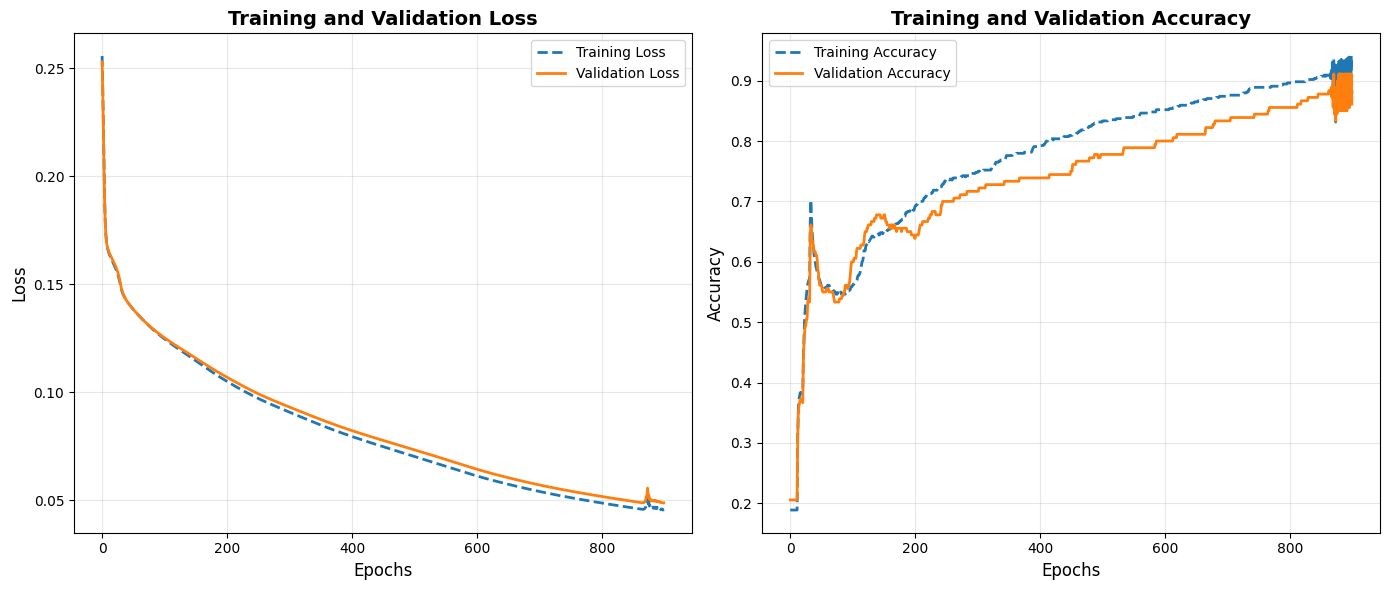

In [20]:
plt.figure(figsize=(14, 6))

# Subplot 1: Training and Validation Loss

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", linestyle='--', linewidth=2)
plt.plot(val_losses, label="Validation Loss", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


# Subplot 2: Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", linestyle='--', linewidth=2)
plt.plot(val_accuracies, label="Validation Accuracy", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


# Adjust layout for better presentation
plt.tight_layout()
plt.show()


Training and Validation Loss
Training Loss: Initially, the training loss is quite high, but it drops quickly during the early stages of training, indicating that the model is rapidly capturing the key patterns in the data. As the training continues, the rate of improvement slows, and the loss declines more gradually. This leveling off suggests the model is nearing its optimal performance within the given configuration and is making smaller gains over time.

Validation Loss: The validation loss follows a similar initial downward trend, though it decreases more slowly and exhibits periodic fluctuations throughout the training process. These fluctuations suggest variability in how well the model generalizes to new data. The occasional spikes in the later epochs hint at the onset of overfitting, where the model may be learning noise or specific patterns from the training set that do not translate well to unseen data.

Training and Validation Accuracy
Training Accuracy: The training accuracy increases rapidly during the early epochs, reflecting the steep drop in training loss. As training progresses, this accuracy continues to rise and eventually levels off at a high value, indicating the model is fitting the training data well.

Validation Accuracy: Although it starts lower, the validation accuracy shows a steady upward trend similar to the training accuracy. However, as training advances, a noticeable gap emerges between the training and validation accuracy. This growing disparity suggests the model is becoming increasingly specialized to the training data, reducing its ability to generalize—a hallmark of overfitting. The occasional dips or stalls in the validation accuracy near the end of training further support this concern.

Overall Summary:
The observed patterns reflect a typical training process where the model improves significantly at first but begins to overfit after a certain point. While performance continues to rise on both datasets, the increasing gap between training and validation metrics highlights the need for strategies like regularization, dropout, or early stopping to boost generalization and prevent overfitting.

# Evaluate the Model

In [21]:
test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Compute accuracy

In [22]:
test_accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 87.78%


# Plot Actual Vs Predicted

<ipython-input-23-a36d6ff43932>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1],


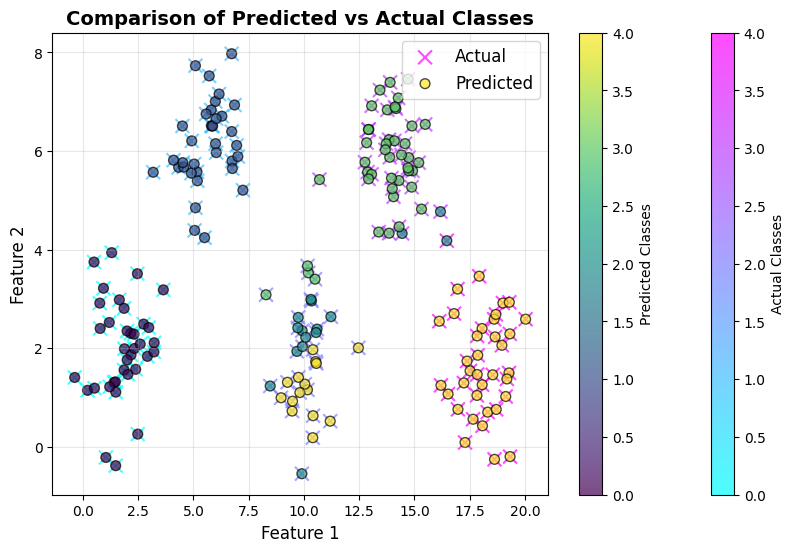

In [23]:
predicted_output = nn.feed_forward(X_test)

# Convert predicted output and actual labels to class labels
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Visualize the Comparison using different colors and markers for better distinction
plt.figure(figsize=(10, 6))

# Create a scatter plot for actual classes using color coding
scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1],
                             c=actual_classes, cmap='cool',
                             s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')

# Overlay predicted classes with different color map and marker
scatter_predicted = plt.scatter(X_test[:, 0], X_test[:, 1],
                                c=predicted_classes, cmap='viridis',
                                s=50, marker='o', alpha=0.7, edgecolor='k', label='Predicted')

# Add plot details and labels
plt.title("Comparison of Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add legend for clarity
plt.legend(loc="best", fontsize=12)

# Display a grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbar to map the color to class labels
plt.colorbar(scatter_actual, label="Actual Classes")
plt.colorbar(scatter_predicted, label="Predicted Classes")

# Show the plot
plt.show()


The scatter plot illustrates the comparison between predicted and actual classes in a 5-class classification scenario, using two features—Feature 1 on the x-axis and Feature 2 on the y-axis. Each point's color indicates its class, while marker shapes distinguish the data type: crosses (x) represent actual labels, and circles (o) represent the model's predictions. The plot background is divided into regions with different colors to depict the model’s decision boundaries, indicating which class is predicted for each combination of feature values.

Most predictions closely match the actual classes, but some misclassifications appear in areas where class regions overlap. These errors are especially noticeable near the edges of decision boundaries, where the model has difficulty differentiating between similar classes. Although the classifier performs well overall, the overlapping zones highlight challenges in precise class separation. Incorporating techniques like feature engineering or using more sophisticated models may help enhance class distinction and improve prediction accuracy.

# Decision Boundary Plot

<ipython-input-24-d34ad1fe5fdd>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap='cool', s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')


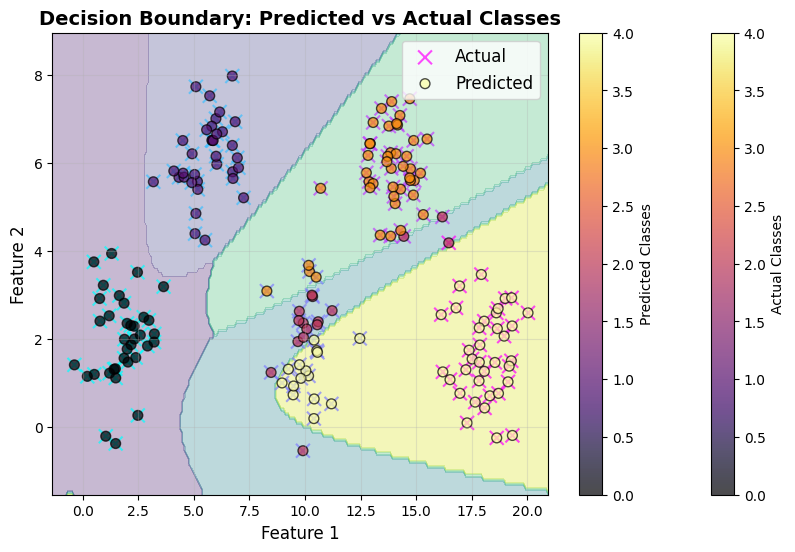

In [24]:
# Predict output from the neural network
predicted_output = nn.feed_forward(X_test)

# Convert predicted output and actual labels to class labels
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Generate meshgrid for decision boundary plotting
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid to visualize decision boundary
Z = np.argmax(nn.feed_forward(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Visualize the comparison using contour plot and scatter plot
plt.figure(figsize=(10, 6))

# Plot decision boundary (contour plot)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot for actual test classes
plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap='cool', s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')

# Overlay predicted classes using a different marker and color map
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap='inferno', s=50, marker='o', alpha=0.7, edgecolor='k', label='Predicted')

# Add plot details and labels
plt.title("Decision Boundary: Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add legend for clarity
plt.legend(loc="best", fontsize=12)

# Display grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbars for both actual and predicted classes
plt.colorbar(label="Actual Classes")
plt.colorbar(label="Predicted Classes")

# Show the plot
plt.show()

The scatter plot compares predicted and actual classes for a 5-class classification task, with each class represented by a distinct color. Actual classes are shown with cross markers (x), while predicted classes are represented by circular markers (o). The decision boundaries are depicted as background colors, indicating the areas where the model predicts each class based on feature values. These boundaries highlight the points at which the model switches from one class to another, offering insight into how well the model separates the classes in the feature space.

Overall, the plot indicates that the model performs well, with most of the predicted classes closely matching the actual classes. However, there are some misclassifications near the decision boundaries, where the predicted markers differ from the actual ones. This suggests that the model struggles to differentiate between certain classes in overlapping regions. While the decision boundaries are generally smooth, improving the model's performance could involve addressing these overlaps through model refinement, regularization, or enhanced feature engineering.